In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data/clean/cleaned_aac_data.csv")

In [6]:
df.head()

,Unnamed: 0,datetime,intake_type,intake_condition,animal_type,sex_upon_intake,sex_status
0,0,2019-01-03t16:19:00.000,stray,normal,dog,male,neutered
1,1,2015-07-05t12:59:00.000,stray,normal,dog,female,spayed
2,2,2016-04-14t18:43:00.000,stray,normal,dog,male,intact
3,3,2013-10-21t07:59:00.000,stray,sick,cat,female,intact
4,4,2022-05-12t00:23:00.000,public assist,normal,cat,male,neutered


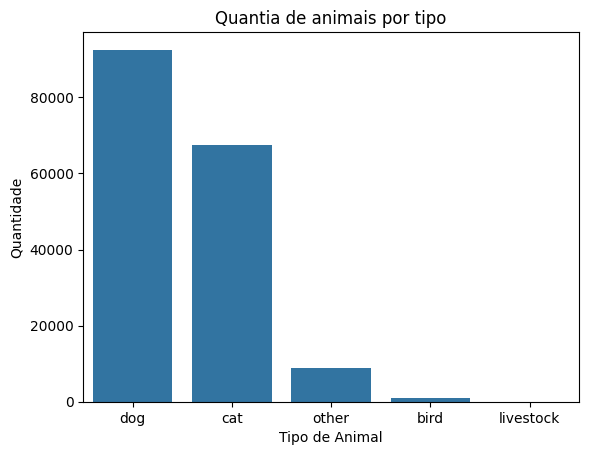

In [ ]:
animal_type_counts = df["animal_type"].value_counts()
sns.barplot(x=animal_type_counts.index, y=animal_type_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")

# Show the plot
plt.show()

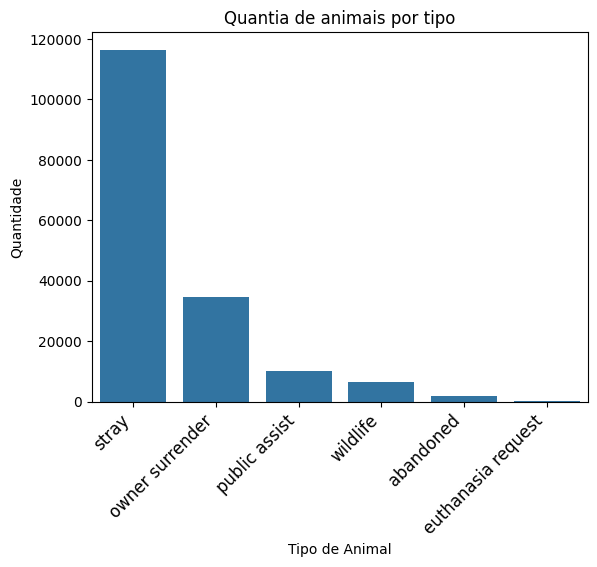

In [ ]:
intake_type_counts = df["intake_type"].value_counts()
sns.barplot(x=intake_type_counts.index, y=intake_type_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()

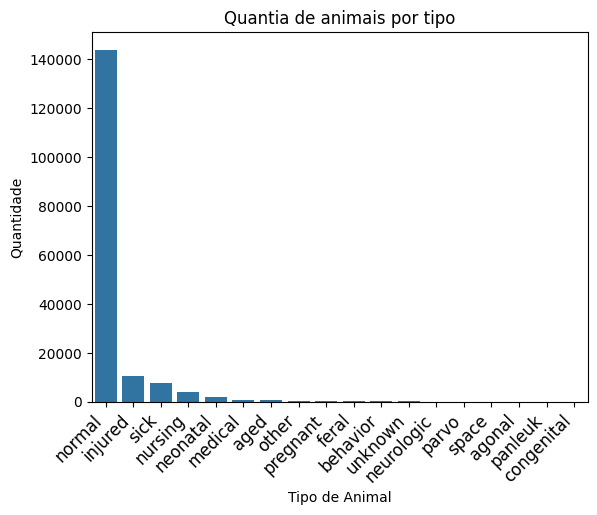

In [15]:
intake_condition_counts = df["intake_condition"].value_counts()
sns.barplot(x=intake_condition_counts.index, y=intake_condition_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()

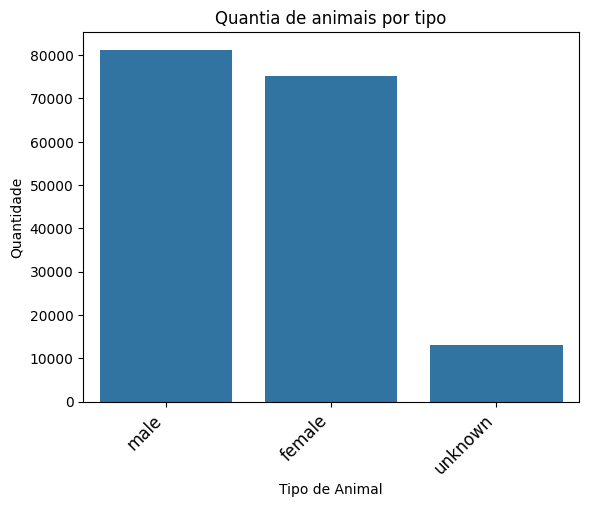

In [16]:
sex_upon_intake_counts = df["sex_upon_intake"].value_counts()
sns.barplot(x=sex_upon_intake_counts.index, y=sex_upon_intake_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()

In [ ]:
fig = sns.lineplot(x="datetime", y="animal_type", data=df, marker="o")

# Set labels and title
plt.title("Value Over Time", fontsize=16)
plt.xlabel("Datetime", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.tight_layout()

fig.autofmt_xdate()

plt.show()

KeyboardInterrupt: 